>
> # MaaS Sim tutorial
>
> ## Synthetic demand generation
>
-----

We generate `params.nP` trip requests (`inData.requests`).

Requests are defined through:
* origin (node of `inData.G` graph)
* destinations (node of `inData.G` graph)
* treq (requested departure time)

----

* origins are drawn from random distribution `math.exp(_params.demand_structure.origins_dispertion*x))`, where `x` is distance from `inData.networkStats.center` (in meters)
* destinations similarly, yet with `_params.demand_structure.destinations_dispertion`
* treq is drawn from uniform distribution between $[t0-T/2,t0+T/2]$, where $t0$ is `params.t0` and $T$ is `params.simTime' (optionally normal distribution may be applied, but it seems impractical)

----

We use function `generate_demand` from `dataStructures.ipynb` to generate the demand

We visualize the demand with `plot_demand` from `utils/plot_utils.ipynb`

----

* `dist` of requerst is given im meters
* `ttrav` of request is either calculated as dist divided by `params.avg_speed` (in [m/s]) or estimated using real-time data (in general travel times shall be estimarted within current study using givwen assumption on trip time and speed).



In [1]:
import os, sys # add MaaSSim to path (not needed if MaaSSim is already in path)
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
import MaaSSim.utils
from MaaSSim.data_structures import structures as inData

In [3]:
params = MaaSSim.utils.get_config('../../data/config/default.json')  # load configuration
params.city = "Delft, Netherlands"
params.paths.G = "../../data/graphs/Delft.graphml"
params.paths.skim = "../../data/graphs/Delft.csv"

In [4]:
inData = MaaSSim.utils.load_G(inData, params) #download_G(inData) # download the graph for the 'p

### Syntehtic demand parameterization

In [5]:
params.nP = 100 #number of passengers

In [6]:
params.city

'Delft, Netherlands'

In [7]:
params.simTime #demand simulation time [hours]

1

In [8]:
params.t0 #midpoint of simulated period

Timestamp('2023-01-05 12:25:28')

In [9]:
params.demand_structure

DotMap(origins_dispertion=-0.0003, destinations_dispertion=-0.001, temporal_dispertion=0.3, temporal_distribution='uniform', _ipython_display_=DotMap(), _repr_mimebundle_=DotMap())

### Synthetic demand generation

In [10]:
inData = MaaSSim.utils.generate_demand(inData, params)

In [11]:
from pathlib import Path  
filepath = Path('../Coevolution_Experiments/Delft_requests.csv')  
# filepath.parent.mkdir(parents=True, exist_ok=True)  
inData.requests.to_csv(filepath, index=False)

In [12]:
inData.requests.head(10)

,pax_id,origin,destination,treq,tdep,ttrav,tarr,tdrop,shareable,schedule_id,dist
0,0,44873602,44852049,2023-01-05 11:55:57,NaN,0 days 00:29:40,2023-01-05 12:25:37,NaN,False,NaN,1780
1,1,44841166,3377240325,2023-01-05 11:57:03,NaN,0 days 00:50:56,2023-01-05 12:47:59,NaN,False,NaN,3056
2,2,365993503,44763130,2023-01-05 11:57:44,NaN,0 days 01:16:10,2023-01-05 13:13:54,NaN,False,NaN,4570
3,3,4555788280,1448535917,2023-01-05 11:57:47,NaN,0 days 00:14:08,2023-01-05 12:11:55,NaN,False,NaN,848
4,4,44821573,44822065,2023-01-05 11:58:46,NaN,0 days 00:22:34,2023-01-05 12:21:20,NaN,False,NaN,1354
5,5,1571088417,44910798,2023-01-05 11:59:45,NaN,0 days 01:14:11,2023-01-05 13:13:56,NaN,False,NaN,4451
6,6,874115743,44842009,2023-01-05 12:00:47,NaN,0 days 00:22:57,2023-01-05 12:23:44,NaN,False,NaN,1377
7,7,44853253,4254658640,2023-01-05 12:03:18,NaN,0 days 00:35:39,2023-01-05 12:38:57,NaN,False,NaN,2139
8,8,1448535920,44871617,2023-01-05 12:03:28,NaN,0 days 00:40:30,2023-01-05 12:43:58,NaN,False,NaN,2430
9,9,44841994,44782444,2023-01-05 12:03:54,NaN,0 days 00:50:34,2023-01-05 12:54:28,NaN,False,NaN,3034


### Visualization

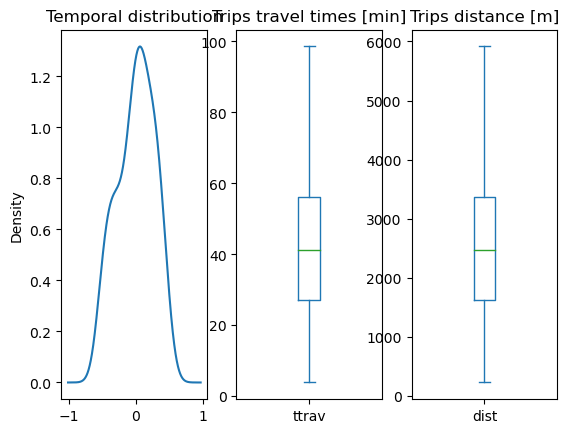

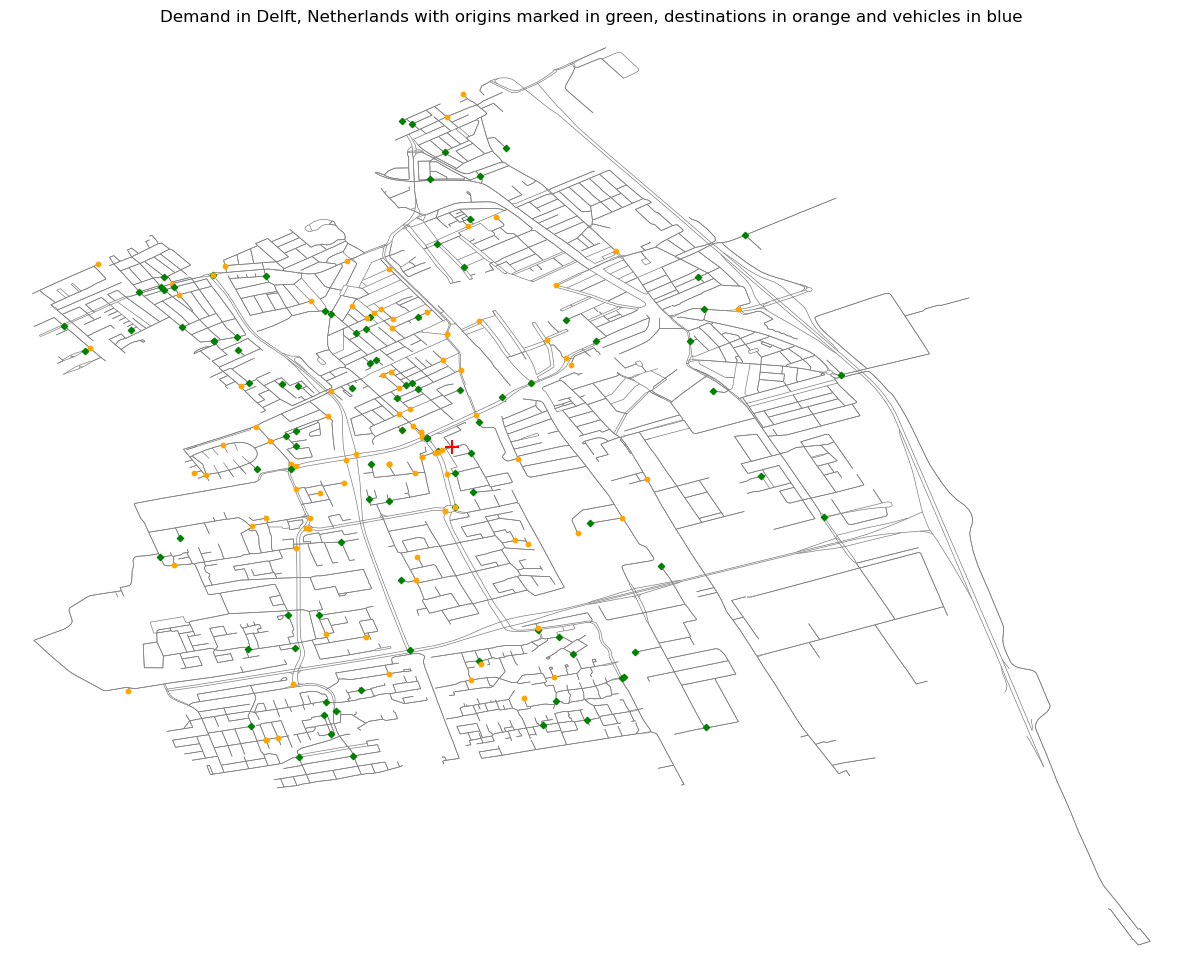

In [13]:
from MaaSSim.visualizations import plot_demand
plot_demand(inData, params = params)

<AxesSubplot: title={'center': 'Trip distances'}, ylabel='Frequency'>

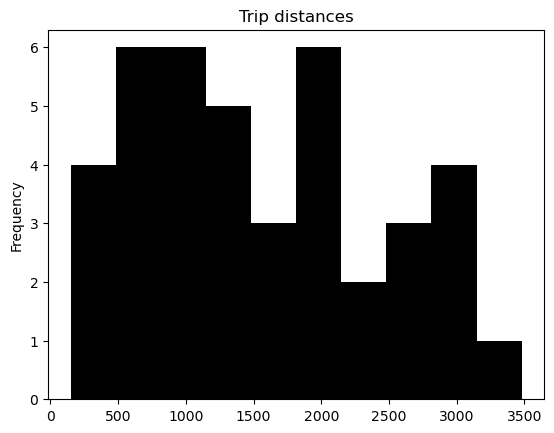

In [43]:
inData.requests.dist.plot(kind='hist',title='Trip distances',color='black')

<AxesSubplot: title={'center': 'Origin distances to center'}, ylabel='Frequency'>

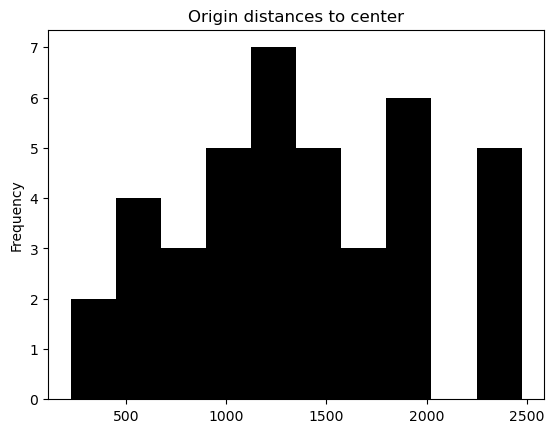

In [44]:
inData.skim[inData.stats['center']][inData.requests.origin].plot(kind='hist', 
                                                                 title='Origin distances to center',
                                                                 color='black')

<AxesSubplot: title={'center': 'Origin distances to center'}, ylabel='Frequency'>

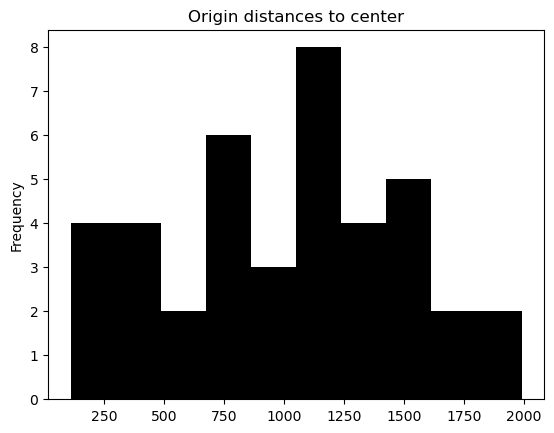

In [45]:
inData.skim[inData.stats['center']][inData.requests.destination].plot(kind='hist', 
                                                                 title='Origin distances to center',
                                                                 color='black')

-------------
Rafal Kucharski, 2020, Delft, r.m.kucharski@tudelft.nl